# Boat Sales Analysis

### Part 2 - Data Exploration

#### Content
1. Import Libraries
2. Load data set 
3. Prepare data for regression
- Convert 'Year Built' into 'Age'
- Subsetting data to include only new boats
4. Exploration on strong correlations
5. Boat Price analysis
6. Categorical Plot
7. Revisit exploration questions
8. Proposed Hypothesis

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt 

### 2. Load Data Set

In [2]:
# Set path to access data files
path = r'C:\Users\tsoew\OneDrive\Desktop\Boat Sales Analysis'

In [3]:
# Import clean data file into dataframe
df = pd.read_csv (os.path.join(path, 'Data', 'Prepared Data', 'boat_data_clean.csv'), index_col=False)

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
# Check data head
df.head()

,Boat Type,Type,Year Built,Length,Width,Views,Price_USD,Country
0,Motor Yacht,new boat from stock,2017,4.00,1.90,226,3667.363,Switzerland
1,Center console boat,new boat from stock,2020,4.00,1.50,75,3751.750,Germany
2,Sport Boat,new boat from stock,2020,3.00,1.00,64,3703.700,Denmark
3,Fishing Boat,new boat from stock,2019,3.55,1.46,58,3653.925,Germany
4,Catamaran,"Used boat,Unleaded",1999,6.20,2.38,474,3956.400,Switzerland


### 3. Prepare data for regression

#### Convert Year Built into Age column

In [6]:
# df['Year Built'] = df['Year Built'].astype(int)
df['Age'] = pd.Timestamp('now').year - df['Year Built'] 

In [7]:
df[['T1','T2','T3', 'T4']]= df['Type'].str.split(' ', expand=True)

#### Subsetting data based only on new boats

For linear regression purpose, we split the data into two:
1. The first one (df) will be used for data analysis using Tableau.
2. The second one (df_new) will only take new boat data for regression purpose.

In [8]:
# Subsetting data with only new boats
df_new = df[df['T1']=='new']

In [9]:
df_new

,Boat Type,Type,Year Built,Length,Width,Views,Price_USD,Country,Age,T1,T2,T3,T4
0,Motor Yacht,new boat from stock,2017,4.00,1.90,226,3667.363,Switzerland,7,new,boat,from,stock
1,Center console boat,new boat from stock,2020,4.00,1.50,75,3751.750,Germany,4,new,boat,from,stock
2,Sport Boat,new boat from stock,2020,3.00,1.00,64,3703.700,Denmark,4,new,boat,from,stock
3,Fishing Boat,new boat from stock,2019,3.55,1.46,58,3653.925,Germany,5,new,boat,from,stock
5,Fishing Boat,new boat from stock,2019,3.64,1.37,45,3582.975,Germany,5,new,boat,from,stock
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9223,Working Boat,"new boat from stock,Electric",2019,3.64,1.37,41,5158.925,Germany,5,new,boat,from,"stock,Electric"
9224,Fishing Boat,"new boat from stock,Unleaded",2019,3.55,1.46,56,5149.250,Germany,5,new,boat,from,"stock,Unleaded"
9230,Sport Boat,"new boat from stock,Unleaded",2020,4.40,1.80,354,4836.425,Germany,4,new,boat,from,"stock,Unleaded"
9231,Pontoon Boat,new boat from stock,2018,4.37,1.89,266,4622.500,Italy,6,new,boat,from,stock


In [10]:
# Rename T1 to Condition to reflect boat condition (new or used)
df.rename(columns={"T1": "Condition"}, inplace=True)

# remove unused columns in main dataframe
df.drop('T2', axis=1, inplace=True)
df.drop('T3', axis=1, inplace=True)
df.drop('T4', axis=1, inplace=True)
df.drop('Type', axis=1, inplace=True)
df.drop('Year Built', axis=1, inplace=True)

In [11]:
# remove unused columns in new dataframe
df_new.drop('T1', axis=1, inplace=True)
df_new.drop('T2', axis=1, inplace=True)
df_new.drop('T3', axis=1, inplace=True)
df_new.drop('T4', axis=1, inplace=True)
df_new.drop('Boat Type', axis=1, inplace=True)
df_new.drop('Type', axis=1, inplace=True)
df_new.drop('Country', axis=1, inplace=True)
df_new.drop('Year Built', axis=1, inplace=True)

C:\Users\tsoew\AppData\Local\Temp\ipykernel_6828\3662484219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop('T1', axis=1, inplace=True)
C:\Users\tsoew\AppData\Local\Temp\ipykernel_6828\3662484219.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop('T2', axis=1, inplace=True)
C:\Users\tsoew\AppData\Local\Temp\ipykernel_6828\3662484219.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop('T3', axis=

In [12]:
df_new.head()

,Length,Width,Views,Price_USD,Age
0,4.00,1.90,226,3667.363,7
1,4.00,1.50,75,3751.750,4
2,3.00,1.00,64,3703.700,4
3,3.55,1.46,58,3653.925,5
5,3.64,1.37,45,3582.975,5


In [13]:
# Check data correlations
df_new.corr()

,Length,Width,Views,Price_USD,Age
Length,1.000000,0.851770,0.019378,0.769330,0.041630
Width,0.851770,1.000000,-0.003966,0.587018,0.050953
Views,0.019378,-0.003966,1.000000,0.104541,-0.044583
Price_USD,0.769330,0.587018,0.104541,1.000000,-0.018388
Age,0.041630,0.050953,-0.044583,-0.018388,1.000000


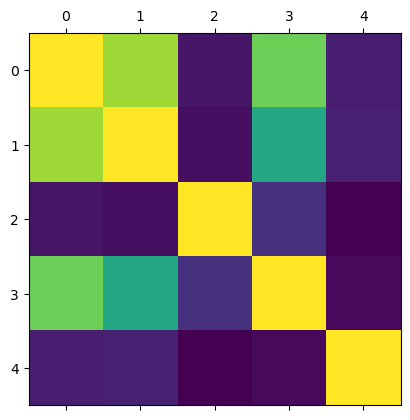

In [14]:
# Create a correlation heatmap using matplotlib
plt.matshow(df_new.corr())
plt.show()

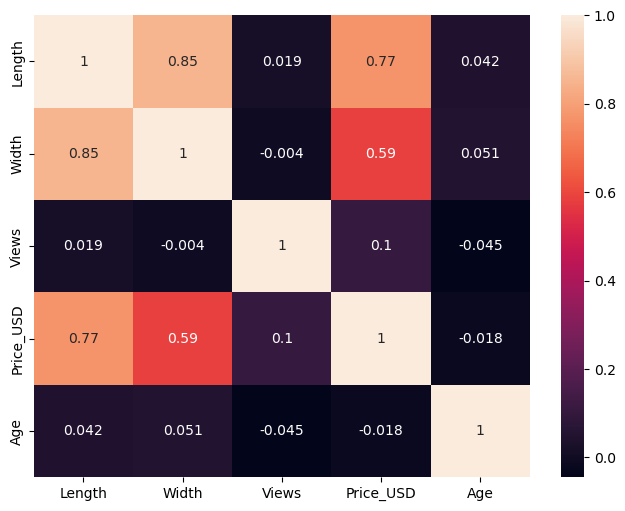

In [15]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(8,6))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix 
# and the subplots defined above. The `annot` argument allows the plot to place the 
# correlation coefficients onto the heatmap.
corr = sns.heatmap(df_new.corr(), annot = True, ax = ax) 


#### Coefficient Analysis

There are 4 coefficients that are considered strong (above 0.5):
1. Price_USD and Length: 0.77 (positive)
2. Price_USD and Width: 0.59 (positive)
3. Length and Width: 0.85 (positive)
4. Age and Width: 0.51 (positive)

#### Correlation Interpretation of the Heat Map

As we are focusing on the boat price for our linear regression, we will focus on the
relationships between Price_USD and other variables.

1. With Length: 0.77. This is a strong positive correlation, meaning longer boats have higher prices.
2. With Width: 0.59. This is a medium to strong positive correlation, meaning wider boats have higher prices.
3. With Views: 0.1. This is a weak positive correlation, meaning expensive boats have more views.
4. With Age: -0.018. This is a weak negative correlation, meaning older boats have lower prices.
    
Other correlation:
1. Width and Length: 0.85. This is a strong positive correlation, meaning the longer boats have wider sizes.
2. Width and Age: 0.51. This is a medium positive correlation, meaning the older boats have wider sizes.

In [16]:
# Save the image into a file
corr.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'heatmap.png'))

### 4. Exploration on the strong correlations 

#### Using pair plot to see the whole correlations in graphic

C:\Users\tsoew\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tsoew\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tsoew\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tsoew\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

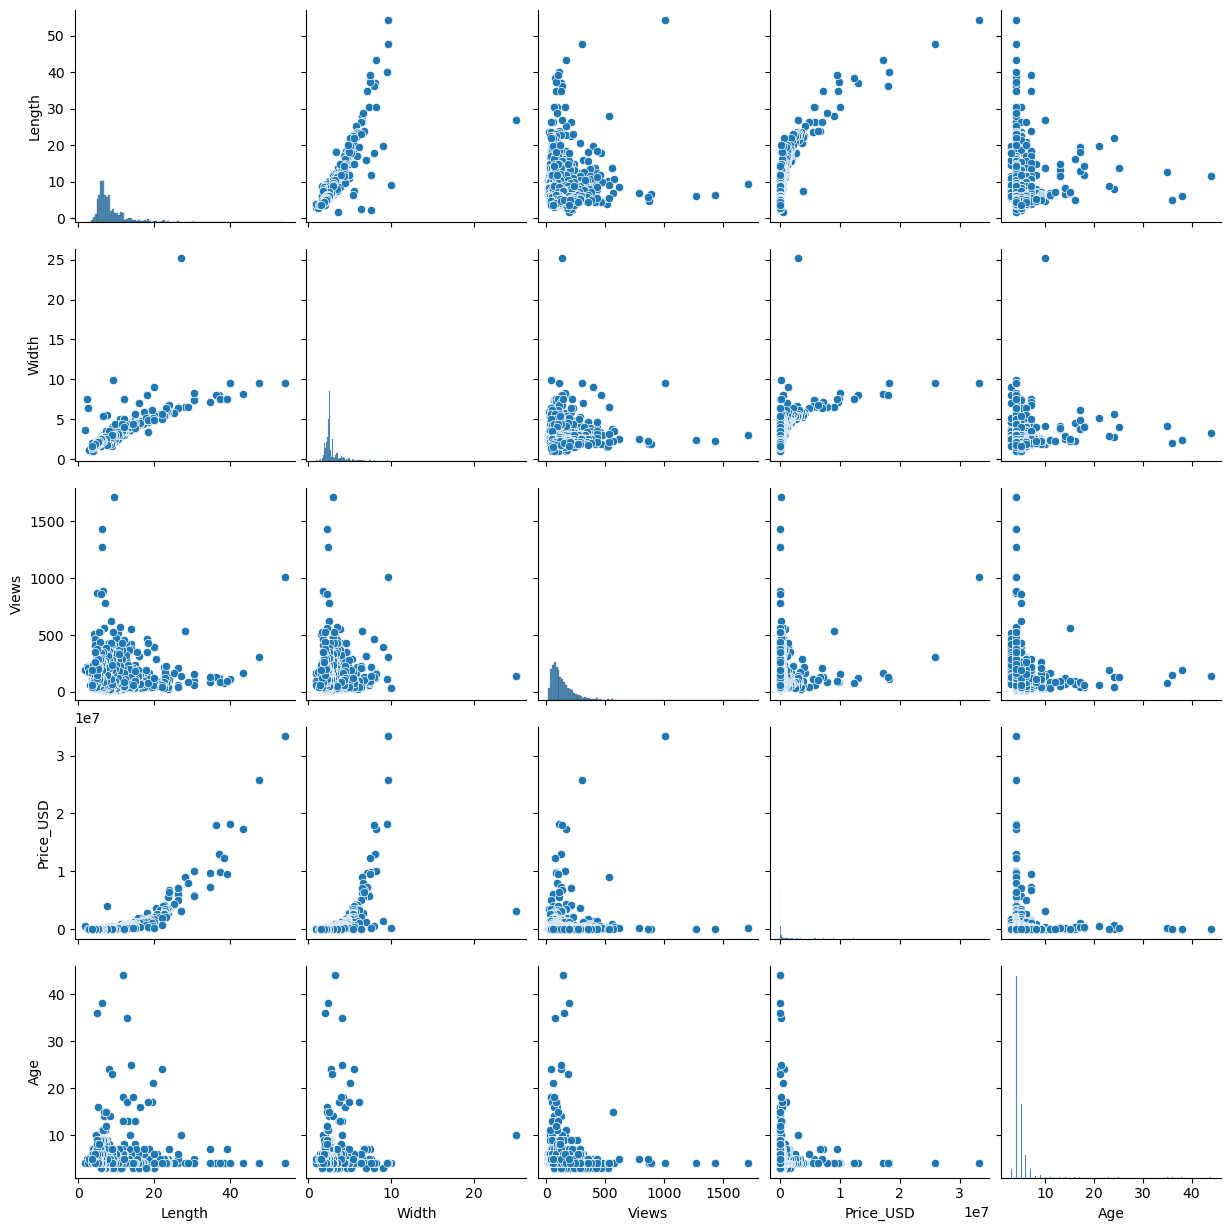

In [17]:
boatpairplot = sns.pairplot(df_new)

In [18]:
# Save the image into a file
boatpairplot.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'boatsales_pair_plot.png'))

#### Scatterplot on Width and Length correlation (0.85)

C:\Users\tsoew\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


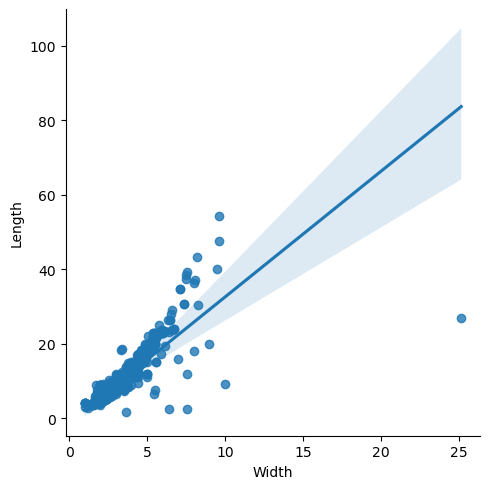

In [19]:
# Create a scatterplot for the columns in seaborn
scatterplot = sns.lmplot(x = 'Width', y = 'Length', data = df_new)

#### Note:
There seems to be an outlier here as we have a boat with width of 25 meters and length about the same size.

In [20]:
# Check out the outlier
df_new[df_new['Width']>20]

,Length,Width,Views,Price_USD,Age
3185,27.0,25.16,137,3117500.0,10


In [21]:
# remove the outlier
df_new.drop(3185, inplace=True)

C:\Users\tsoew\AppData\Local\Temp\ipykernel_6828\2812453308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(3185, inplace=True)


C:\Users\tsoew\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


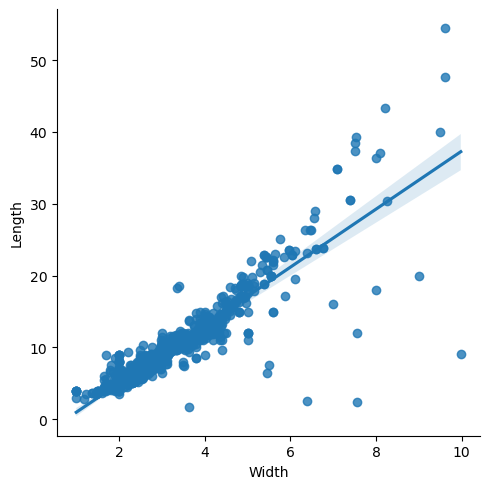

In [22]:
# check the correlation again
scatterplot = sns.lmplot(x = 'Width', y = 'Length', data = df_new)

#### Note:
It looks better now after the outlier is removed

In [23]:
# Save the image into a file
scatterplot.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'width_length_plot.png'))

### 5. Boat Price Analysis

#### Scatterplot on Price_USD and Width correlation (0.59)

C:\Users\tsoew\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


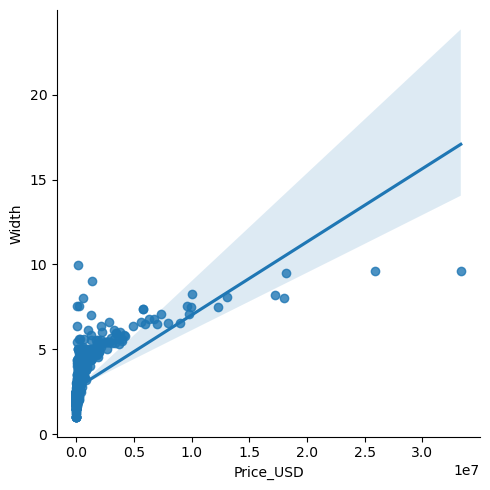

In [24]:
scatterplot = sns.lmplot(data=df_new, x ='Price_USD', y='Width')

In [25]:
# Save the image into a file
scatterplot.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'price_width_plot.png'))

#### Scatterplot on Price_USD and Length correlation (0.77)

C:\Users\tsoew\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


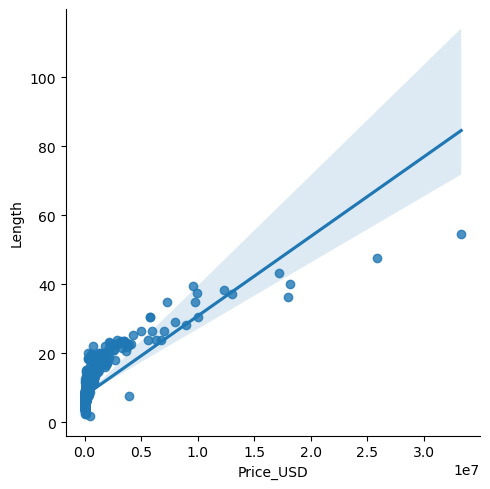

In [26]:
scatterplot = sns.lmplot(data=df_new, x ='Price_USD', y='Length')

In [27]:
# Save the image into a file
scatterplot.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'price_length_plot.png'))

#### Scatterplot on Width and Age correlation (0.51)

C:\Users\tsoew\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


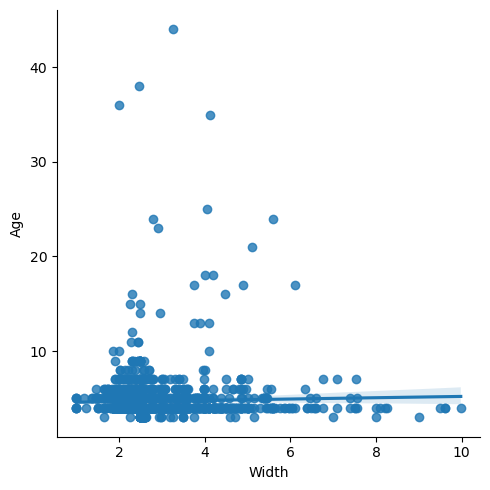

In [28]:
scatterplot = sns.lmplot(data=df_new, x ='Width', y='Age')

In [29]:
# Save the image into a file
scatterplot.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'width_age_plot.png'))

### 6. Create Categorical plot

C:\Users\tsoew\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Width', ylabel='Count'>

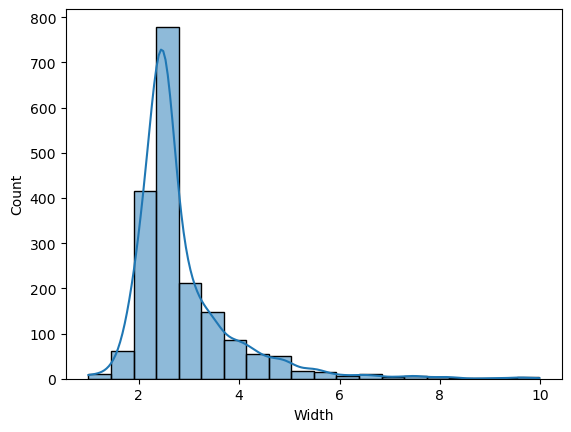

In [30]:
# Creating a histogram to see Width distribution
sns.histplot(df_new['Width'], bins = 20, kde = True)

#### Note:
Most boat widths fall within range 2-3 meters. There are very small number of boats with width larger than 6 meters.

C:\Users\tsoew\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Length', ylabel='Count'>

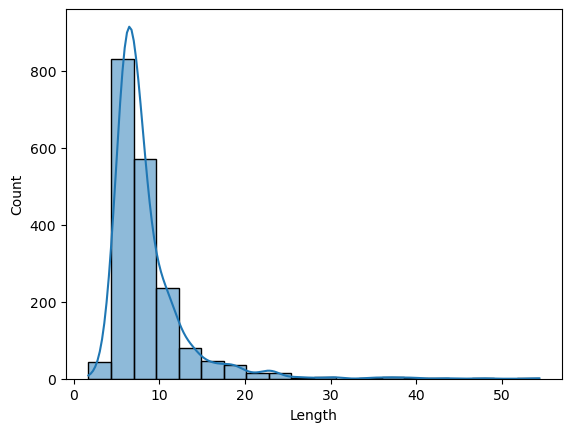

In [31]:
# Creating a histogram to see Length distribution
sns.histplot(df_new['Length'], bins = 20, kde = True)

#### Note:
Most boat lengths fall within 5 to 15 meters range. There are very few boats are longer than 25 meters.

C:\Users\tsoew\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Views', ylabel='Count'>

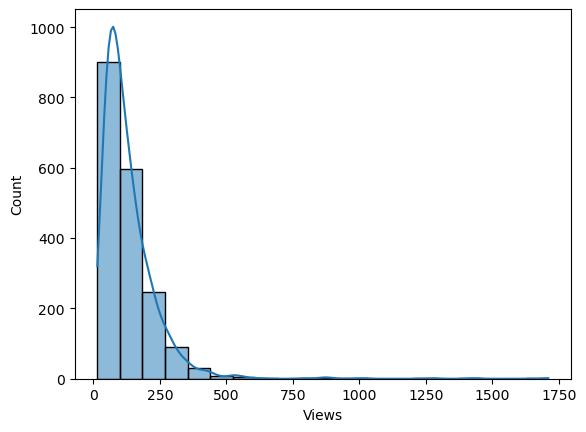

In [32]:
# Creating a histogram to see Views distribution
sns.histplot(df_new['Views'], bins = 20, kde = True)

#### Note:
Although very few, but there are very popular boats with views more than 500 times.

C:\Users\tsoew\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price_USD', ylabel='Count'>

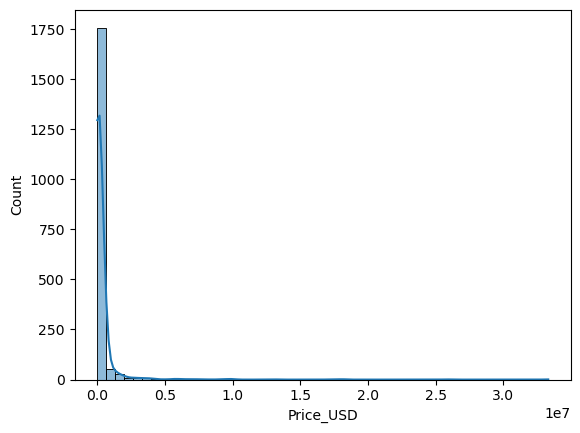

In [33]:
# Creating a histogram to see Price distribution
sns.histplot(df_new['Price_USD'], bins = 50, kde = True)

#### Note:
More than 90% of the boats have price under $1 Million

### 7. Revisit Exploration Questions
- What are the most popular boats?
- Which countries have the most popular boats?
- Which factor determines the boat price?
- Which factor determines the number of views?
- Perform a predictive analysis on boat price based on other numerical values in the dataset

To answer some of the questions we go back to the first clean data set before it was split
to smaller data set.

In [34]:
df.head()

,Boat Type,Length,Width,Views,Price_USD,Country,Age,Condition
0,Motor Yacht,4.00,1.90,226,3667.363,Switzerland,7,new
1,Center console boat,4.00,1.50,75,3751.750,Germany,4,new
2,Sport Boat,3.00,1.00,64,3703.700,Denmark,4,new
3,Fishing Boat,3.55,1.46,58,3653.925,Germany,5,new
4,Catamaran,6.20,2.38,474,3956.400,Switzerland,25,Used


### Exploratory Analysis

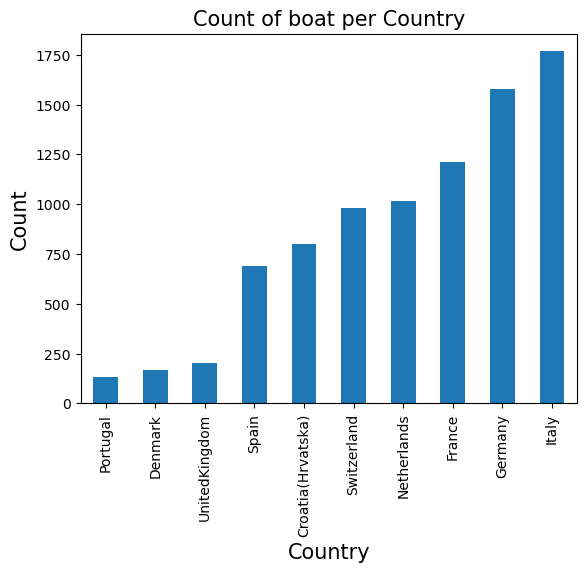

In [35]:
country = df.groupby('Country').size().sort_values(ascending=True).tail(10)
g = country.plot(kind='bar')
plt.xlabel("Country", size=15)
plt.ylabel('Count', size=15)
plt.title("Count of boat per Country", size=15);

### Top 5 countries for number of boats 
1. Italy
2. Germany
3. France
4. Netherlands
5. Switzerland

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Austria'),
  Text(1, 0, 'UnitedKingdom'),
  Text(2, 0, 'Denmark'),
  Text(3, 0, 'Spain'),
  Text(4, 0, 'Croatia(Hrvatska)'),
  Text(5, 0, 'France'),
  Text(6, 0, 'Netherlands'),
  Text(7, 0, 'Italy'),
  Text(8, 0, 'Germany'),
  Text(9, 0, 'Switzerland')])

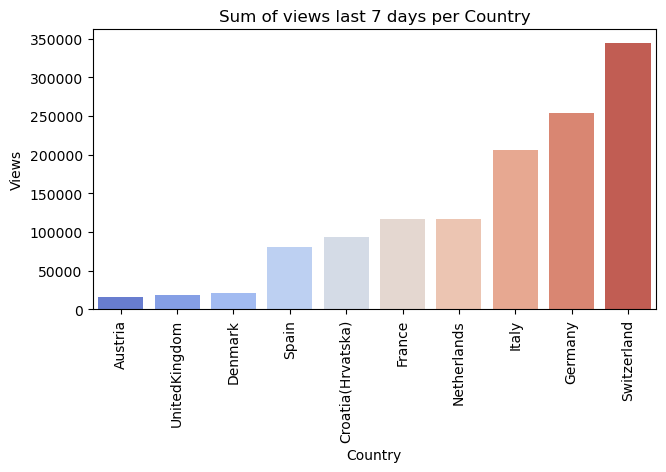

In [36]:
fig = plt.figure(figsize=(16,8) )
ax1 = fig.add_subplot(223)
Country_View= df.groupby('Country')['Views'].sum().sort_values().reset_index(drop=False).tail(10)

sns.barplot(x='Country', y='Views', data=Country_View, palette="coolwarm")
plt.title("Sum of views last 7 days per Country")
plt.xticks(rotation=90) 

### Top 5 countries for total views

1. Switzerland
2. Germany
3. Italy
4. Netherlands
5. France

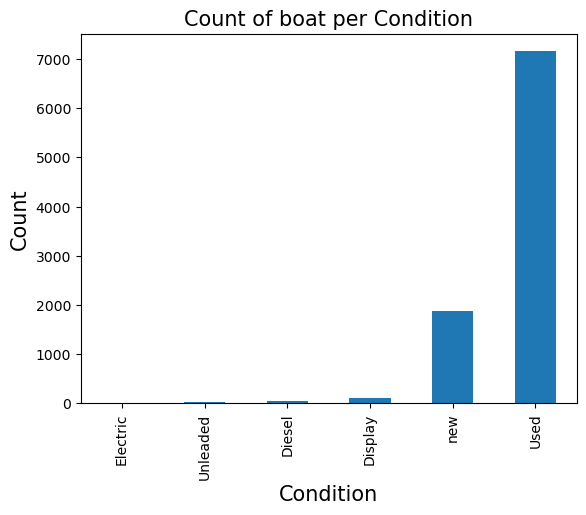

In [37]:
condition = df.groupby('Condition').size().sort_values(ascending=True).tail(10)
g= condition.plot(kind='bar')
plt.xlabel("Condition", size=15)
plt.ylabel('Count', size=15)
plt.title("Count of boat per Condition", size=15);

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Electric'),
  Text(1, 0, 'Unleaded'),
  Text(2, 0, 'Diesel'),
  Text(3, 0, 'Display'),
  Text(4, 0, 'new'),
  Text(5, 0, 'Used')])

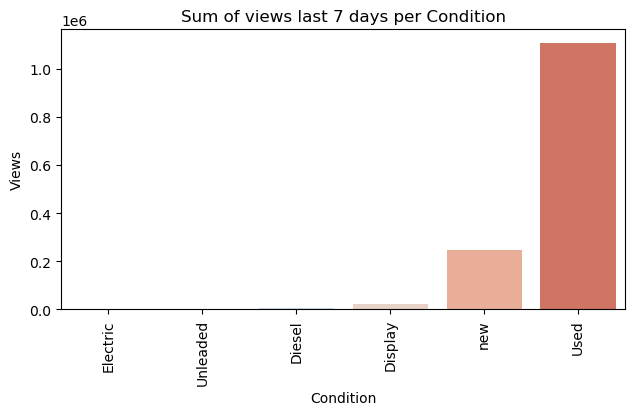

In [38]:
fig = plt.figure(figsize=(16,8) )
ax1 = fig.add_subplot(223)
Condition_View= df.groupby('Condition')['Views'].sum().sort_values().reset_index(drop=False).tail(10)

sns.barplot(x='Condition', y='Views', data=Condition_View, palette="coolwarm")
plt.title("Sum of views last 7 days per Condition")
plt.xticks(rotation=90) 

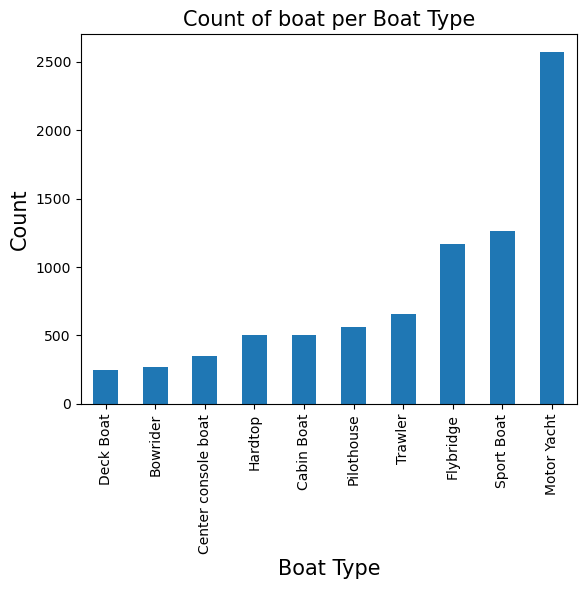

In [39]:
boat_type = df.groupby('Boat Type').size().sort_values(ascending=True).tail(10)
g= boat_type.plot(kind='bar')
plt.xlabel("Boat Type", size=15)
plt.ylabel('Count', size=15)
plt.title("Count of boat per Boat Type", size=15);

### Most Popular Boat Type, by number of boats

1. Motor Yacht, 
2. Sport Boat 
3. Flybridge
4. Trawler
5. Pilothouse

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Fishing Boat'),
  Text(1, 0, 'Center console boat'),
  Text(2, 0, 'Bowrider'),
  Text(3, 0, 'Hardtop'),
  Text(4, 0, 'Pilothouse'),
  Text(5, 0, 'Trawler'),
  Text(6, 0, 'Cabin Boat'),
  Text(7, 0, 'Flybridge'),
  Text(8, 0, 'Sport Boat'),
  Text(9, 0, 'Motor Yacht')])

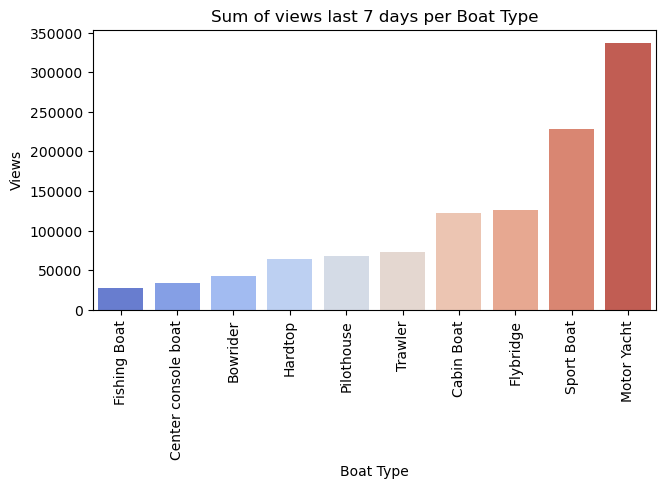

In [40]:
fig = plt.figure(figsize=(16,8) )
ax1 = fig.add_subplot(223)
Boat_Type_View= df.groupby('Boat Type')['Views'].sum().sort_values().reset_index(drop=False).tail(10)
#Boat_Type_View = df.groupby('Boat Type')['Views'].sum().sort_values().tail(10)
sns.barplot(x='Boat Type', y='Views', data=Boat_Type_View, palette="coolwarm")
plt.title("Sum of views last 7 days per Boat Type")
plt.xticks(rotation=90) 
#ax1.tick_params( rotation=90)
#display(Boat_Type_View[-5:])

### Most popular Boat Type, by number of total views

1. Motor Yacht
2. Sport Boat
3. Flybridge
4. Cabin Boat
5. Trawler

### Proposed Hypothesis

### 1. Price of a boat will be influenced by the size of the boat

### 2. Views of a boat will be determined by the type of the boat

In [41]:
# Save the modified files
df.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'boat_data_wrangled.csv'))
df_new.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'newboat_data_split.csv'))


### --------------  End of Boat Analysis Part 2  ------------------